<a href="https://colab.research.google.com/github/oluke/nucleotide-identifier/blob/main/UAS_Biosis_Lukman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Anggota Kelompok: Lukman, Tiara Dinda Hapsari, Abdul Malik dan Ester Frescilla Simbolon.**

**Kelas: 3A - SIK**

**Universitas: Universitas Pendidikan Indonesia**

**Dosen Pengampu: Ishak Ariawan, S.Pd., M.Kom.**

## DNA Sequence Mengguakan Machine Learning

Dalam buku notebook ini, kami akan menerapkan model klasifikasi yang dapat memprediksi fungsi gen berdasarkan urutan DNA. Data DNA diperoleh dari laman [NCBI](https://ncbi.nlm.nih.gov/)

In [ ]:
#import semua library dibutuhkan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

### Import data-data yang akan diklasifikasikan
Dalam penelitian ini ada tiga kelas mamalia laut berdasarkan jenis spesies yang akan diklasifikasikan, yaitu:
1. Delphinus capensis 
2. Dugong dugon 
3. Orcaella brevirostris 

In [ ]:
capensis = pd.read_table('/content/dna1.txt')
capensis.head()

,sequence,class
0,TCAAGGAAGAGACATTAAACCTCACCACCAACACCCAAAGCTGGAA...,1
1,TCAAGGAAGAGACATTAAACCTCACCACCAACACCCAAAGCTGGAA...,1
2,GGTTCAGGAATTACACGGTTTATAGAGGGATCAGGGTTACAGGTTC...,1
3,ATGCTGTCCTGCAAGGCCGTGGCCTTTCTGCTGGTGGTGCATGCAG...,1
4,ATGGGCAGCGCCGAGAACCGCAGCGACGGCTCGGAGGACGCGGGGG...,1


In [ ]:
dugon = pd.read_table('dna2.txt')
dugon.head()

,sequence,class
0,TAGTGGAAATAAACAAATCTCTAAGGACCTAATGAGTGCTACCTAC...,2
1,ATGTAAGGTTTCAAATGGAGTCCCATGTTGACTTAAATTCACATGG...,2
2,AACATTTTTATTACTAAATAAAAAAAGATTCTTTCTTCATAGCTTA...,2
3,CAACATACTGAGTACCTGCTGTGTGACTGGAAACCCTGGTGGCATA...,2
4,GGCTATCTACCCCTATGAAAGATTTTAAGTCTCTGAAGACTAATGA...,2


In [ ]:
brevirostris = pd.read_table('dna3.txt')
brevirostris.head()

,sequence,class
0,GAAAAAAGCTTATTGTATAATTACCACAACATCACAGTACTATGCC...,3
1,GAAAAAAGCTTATTGTACAATTACCATAACATCACAGTACTATGTC...,3
2,GAAAAAAGCTTATTGTACAATTACCACAACATCACAGTACTATGCC...,3
3,GAAAAAAGCTTATTGTACAATTACCACAACATCACAGTACTATGCC...,3
4,GAAAAAAGCTTATTGTACAATTACCACAACATCACAGTACTATGCC...,3


### Melakukan perhidungan k-mer pada DNA sequence 

Tantangan dalam klasifikasi data dalam bentuk kata adalah tidak satu pun dari metode jika menggunakan data di atas mdapat diklasifikasikan karena data vektor tersebut tidak memiliki panjang yang seragam, dan panjang seragam adalah persyaratan untuk memasukkan data ke algoritma klasifikasi atau regresi. Jadi dengan metode di atas harus menggunakan hal-hal seperti memotong urutan atau mengisi dengan "n" atau "0" untuk mendapatkan vektor dengan panjang yang seragam.

Urutan DNA dan protein dapat dilihat sebagai natural language. Bahasa mengkodekan instruksi serta fungsi untuk molekul yang ditemukan di semua bentuk DNA mahluk hidup. Analogi bahasa urutan berlanjut dengan genom sebagai buku, suburutan (gen dan keluarga gen) adalah kalimat dan bab, k-mer dan peptida (motif) adalah kata, dan basa nukleotida dan asam amino adalah secara alfabetis. Karena analogi tersebut tampak sangat tepat, masuk akal bahwa pekerjaan luar biasa yang dilakukan di bidang pemrosesan bahasa alami juga harus diterapkan pada bahasa alami dari sekuens DNA dan protein.

Metode yang digunakan di sini adalah pertama-tama mengambil urutan biologis yang panjang dan memecahnya menjadi "words" yang tumpang tindih dengan panjang k-mer. Misalnya, jika menggunakan "words" dengan panjang 6 (heksamer), "ATGCATGCA" menjadi: 'ATGCAT', 'TGCATG', 'GCATGC', 'CATGCA'. Kemudian dipecah menjadi 4 kata heksamer.

Berikut adalah fungsi yang dapat digunakan untuk mengubah urutan (string) apa pun menjadi kata k-mer yang tumpang tindih:

### Pendifinisian fungsi untuk mengumpulkan semua kemungkinan k-mer yang tumpang tindih dengan panjang yang ditentukan dari setiap urutan string. k-mers diterpkan dengan urutan lengkap.

In [ ]:
# fungsi untuk mengubah rangkaian string menjadi kata k-mer, ukuran default = 6 (kata heksamer)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

## Ubah urutan data training menjadi k-mer tumpang tindih dengan panjang 6.

In [ ]:
capensis['words'] = capensis.apply(lambda x: getKmers(x['sequence']), axis=1)
capensis = capensis.drop('sequence', axis=1)
dugon['words'] = dugon.apply(lambda x: getKmers(x['sequence']), axis=1)
dugon = dugon.drop('sequence', axis=1)
brevirostris['words'] = brevirostris.apply(lambda x: getKmers(x['sequence']), axis=1)
brevirostris = brevirostris.drop('sequence', axis=1)

### Data squence diubah menjadi huruf kecil, dibagi menjadi semua kata k-mer dengan panjang.

In [ ]:
capensis.head()

,class,words
0,1,"[tcaagg, caagga, aaggaa, aggaag, ggaaga, gaaga..."
1,1,"[tcaagg, caagga, aaggaa, aggaag, ggaaga, gaaga..."
2,1,"[ggttca, gttcag, ttcagg, tcagga, caggaa, aggaa..."
3,1,"[atgctg, tgctgt, gctgtc, ctgtcc, tgtcct, gtcct..."
4,1,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


In [ ]:
dugon.head()

,class,words
0,2,"[tagtgg, agtgga, gtggaa, tggaaa, ggaaat, gaaat..."
1,2,"[atgtaa, tgtaag, gtaagg, taaggt, aaggtt, aggtt..."
2,2,"[aacatt, acattt, catttt, attttt, ttttta, tttta..."
3,2,"[caacat, aacata, acatac, catact, atactg, tactg..."
4,2,"[ggctat, gctatc, ctatct, tatcta, atctac, tctac..."


In [ ]:
brevirostris.head()

,class,words
0,3,"[gaaaaa, aaaaaa, aaaaag, aaaagc, aaagct, aagct..."
1,3,"[gaaaaa, aaaaaa, aaaaag, aaaagc, aaagct, aagct..."
2,3,"[gaaaaa, aaaaaa, aaaaag, aaaagc, aaagct, aagct..."
3,3,"[gaaaaa, aaaaaa, aaaaag, aaaagc, aaagct, aagct..."
4,3,"[gaaaaa, aaaaaa, aaaaag, aaaagc, aaagct, aagct..."


### Scikit-learn digunakan untuk melakukan proses NLP untuk penghitungan k-mer, ubah data k-mer setiap gen menjadi kalimat string yang dapat digunakan oleh count vectorizer. variabel y dibuat untuk menyimpan label kelas.

In [ ]:
capensis_texts = list(capensis['words'])
for item in range(len(capensis_texts)):
    capensis_texts[item] = ' '.join(capensis_texts[item])
y_data = capensis.iloc[:, 0].values                         

In [ ]:
print(capensis_texts[2])

ggttca gttcag ttcagg tcagga caggaa aggaat ggaatt gaatta aattac attaca ttacac tacacg acacgg cacggt acggtt cggttt ggttta gtttat tttata ttatag tataga atagag tagagg agaggg gaggga agggat gggatc ggatca gatcag atcagg tcaggg cagggt agggtt gggtta ggttac gttaca ttacag tacagg acaggt caggtt aggttc ggttct gttctt ttctta tcttag cttagt ttagta tagtaa agtaag gtaagg taaggt aaggta aggtat ggtatc gtatct tatctt atcttg tcttga cttgac ttgacc tgaccc gaccca acccaa cccaat ccaata caataa aataaa ataaag taaagc aaagcg aagcga agcgag gcgagg cgagga gaggaa aggaaa ggaaaa gaaaat aaaata aaataa aataac ataaca taacat aacatt acatta cattag attagg ttagga taggag aggagt ggagta gagtaa agtaaa gtaaac taaact aaactc aactct actctg ctctgc tctgcc ctgccc tgccca gcccaa cccaat ccaatc caatca aatcag atcagt tcagtt cagttg agttgg gttggg ttgggg tggggt ggggtg gggtgt ggtgta gtgtaa tgtaat gtaatt taatta aattat attatt ttattt tatttg atttgt tttgtg ttgtga tgtgaa gtgaat tgaatc gaatcg aatcgg atcgga tcggat cggatc ggatct gatctc atctct tctctg ctctgg tctgga ctggat

In [ ]:
y_data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
dugon_texts = list(dugon['words'])
for item in range(len(dugon_texts)):
    dugon_texts[item] = ' '.join(dugon_texts[item])
y_dugon = dugon.iloc[:, 0].values

In [ ]:
y_dugon

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [ ]:
brevirostris_texts = list(brevirostris['words'])
for item in range(len(brevirostris_texts)):
    brevirostris_texts[item] = ' '.join(brevirostris_texts[item])
y_brevirostris = brevirostris.iloc[:, 0].values   

In [ ]:
y_brevirostris

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3])

## Terapkan BAG of WORDS menggunakan CountVectorizer menggunakan NLP

In [ ]:
# Membuat model Bag of Words menggunakan CountVectorizer()
# Hal ini sama dengan penghitungan k-mer
# Ukuran n-gram dari 4 sebelumnya ditentukan oleh pengujian
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(capensis_texts)
X_dugon = cv.transform(dugon_texts)
X_brevirostris = cv.transform(brevirostris_texts)

In [ ]:
print(X.shape)
print(X_dugon.shape)
print(X_brevirostris.shape)

(50, 47707)
(50, 47707)
(50, 47707)


### Dapat dilihat bahwa dataset yang digunakan relatif seimbang.

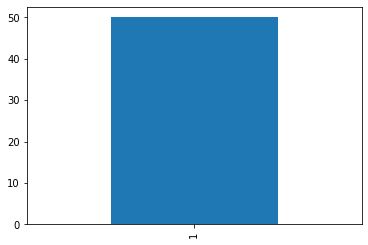

In [ ]:
capensis['class'].value_counts().sort_index().plot.bar()

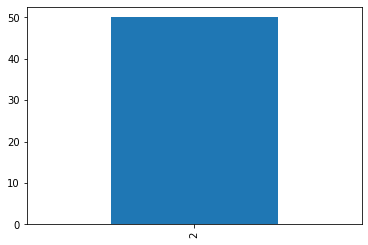

In [ ]:
dugon['class'].value_counts().sort_index().plot.bar()

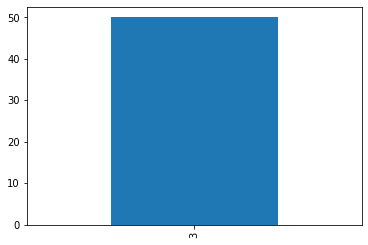

In [ ]:
brevirostris['class'].value_counts().sort_index().plot.bar()

### Split dataset ke dalam data training dan data uji

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(40, 47707)
(10, 47707)


### Pengklasifikasi dilakukan dengan menggunakan multinomial naive Bayes. Parameter yang cocok digunkana adalah ngram 4 dan model alfa 0,1.

Support Vektor Machine

Random Forest

Decision Tree

Naïve Bayes

Artificial Neural Network

K-NN	


In [ ]:
### Aplikasikan beberapa algoritma yang akan digunakan ###
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# SVM
# svm_model = svm.SVC()
# svm_model.fit(X_train, y_train)

# RF
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X_train, y_train)

# NB
nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train, y_train)

# DT
dt_model = DecisionTreeClassifier(random_state=0, max_depth=2)
dt_model.fit(X_train, y_train)

# ann
ann_model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
ann_model.fit(X_train, y_train)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_model.predict(X_test)

### Pengujian akurasi model menggunakan beberapa metrik kinerja model seperti confusion matrix, accuracy, precision, recall dan f1 score. Hasil perolahan skor akurasi menunjukkan bahwa model dapat mempelajari data dengan baik.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   1
Actual       
1          10
accuracy = 1.000 
precision = 1.000 
recall = 1.000 
f1 = 1.000
